In [1]:
!nvidia-smi

Mon Apr  1 14:15:36 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 545.29.06              Driver Version: 545.29.06    CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100 80GB PCIe          Off | 00000000:22:00.0 Off |                    0 |
| N/A   32C    P0              54W / 300W |      4MiB / 81920MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [1]:
import sys, os
from lora import LoRA, image_grid
import matplotlib.pyplot as plt

import torch
print(torch.cuda.is_available())
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print('Device:', device)
print('Current cuda device:', torch.cuda.current_device())
print('Count of using GPUs:', torch.cuda.device_count())

True
Device: cuda
Current cuda device: 0
Count of using GPUs: 1


## Set LoRA
---

* basic
    - base_model_path: runwayml/stable-diffusion-v1-5
    - device: cuda
    - seed: 1

In [2]:
model = LoRA()

- base_model_path: runwayml/stable-diffusion-v1-5
- device: cuda
- seed: 1


* custom (example)
    - base_model_path: dreamlike-art/dreamlike-photoreal-2.0
    - device: cuda
    - seed: 43

In [4]:
model = LoRA(base_model_path = "dreamlike-art/dreamlike-photoreal-2.0",
            seed  = 43)

- base_model_path: dreamlike-art/dreamlike-photoreal-2.0
- device: cuda
- seed: 43


## Set pipe
---

* create pipe 

In [4]:
model.set_pipe()

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


* you can check default modules of pipe

In [5]:
model.pipe

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.27.2",
  "_name_or_path": "runwayml/stable-diffusion-v1-5",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

## Inference
---

In [6]:
imgs = model.infer( prompts=[ "Car wheel",
                             "Car wheel, front view", 
                             "Car wheel, side view, cold color",
                             "Car wheel, Gold with Machined face"], 
                    common_prompt = 'best quaility, masterpiece',
                    n = 1) 

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

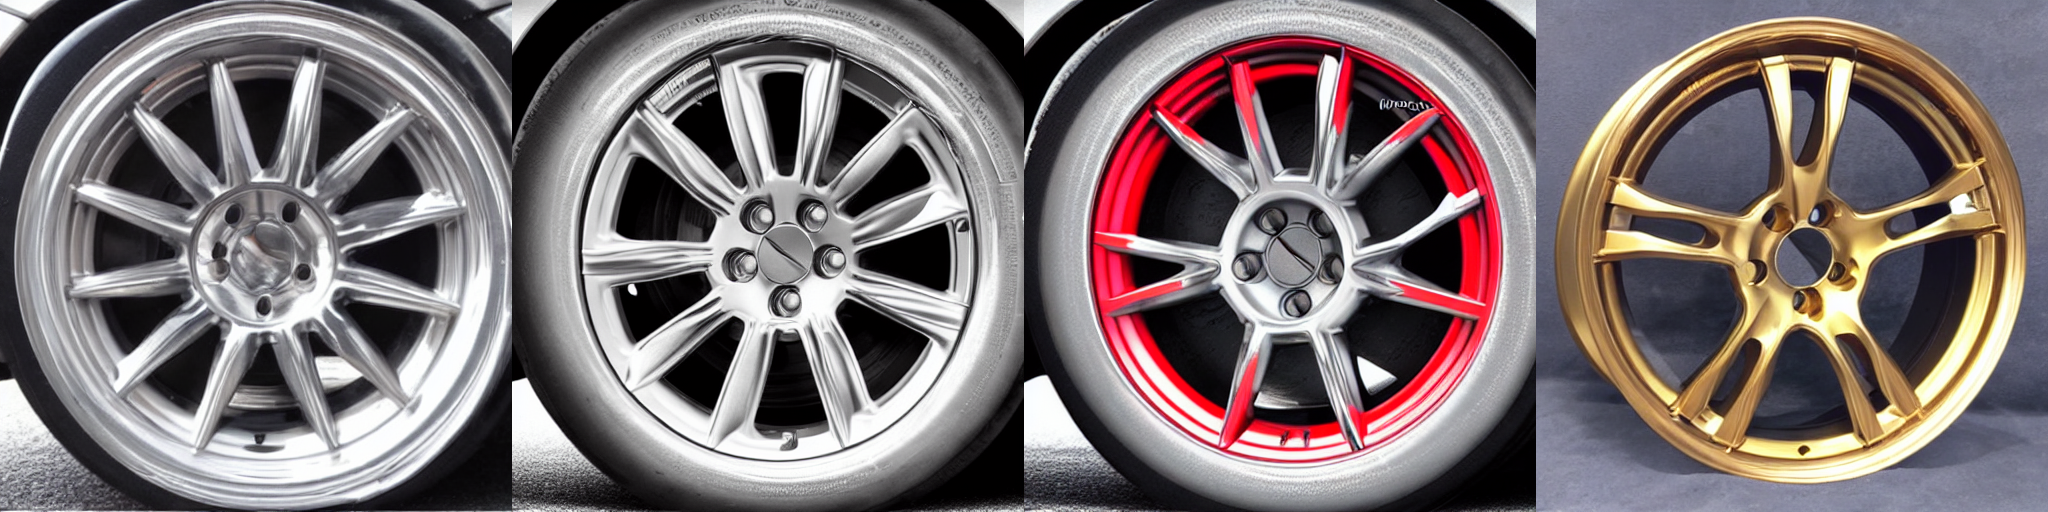

In [8]:
image_grid(imgs, 1, len(imgs))